## **1. Crea un espacio dentro del repositorio de GitHub que creaste para el portafolio de análisis (por ejemplo, una carpeta para el módulo de ML con una subcarpeta para este entregable).**

In [1]:
#Primero definiremos las librerias que se utilizaran
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor

## **2. Define una semilla que corresponda con los últimos cuatro dígitos de tu matrícula**

In [8]:
#La matricula es 01284657, asi que se escogen los ultimos 4 digitos
seed = 4657

## **3. Carga el set de datos de Valhalla y divide el set de datos en entrenamiento (40%), validación (40%), y prueba (20%), utilizando el método train_test_split. y la semilla definida arriba**

In [23]:
#Primero haremos la lectura del dataset y haremos la division de las columnas en X y y
v = pd.read_csv('Valhalla23.csv')
x = v.drop(columns=['Valks'])
y = v['Valks']

#Primero haremos la division de dos variables con el train_test_split, una variable siendo la de
#test, la cual tendra el 20% de los datos, y la otra variable sera v_1, la cual tendra el restante de los datos
x_1, x_test, y_1, y_test = train_test_split(x, y, test_size=0.2, random_state=seed)

#Ahora con los datos restantes haremos la division de 40 y 40 a las variables de train y validacion
x_train, x_val, y_train, y_val = train_test_split(x_1, y_1, test_size=0.5, random_state=seed)

#Confirmamos los valores de las variables
print('x_train:', x_train.shape)
print('x_val:', x_val.shape)
print('x_test:', x_test.shape)


x_train: (40, 1)
x_val: (40, 1)
x_test: (20, 1)


## **4 .Entrena un modelo base de tipo SGDRegressor que utilice una tasa de aprendizaje de 1E-4, un máximo de iteraciones de un millón, y que utilice la semilla definida arriba**

In [24]:
#Se hace el entrenamiento con el uso de SGDRegressor y las especificaciones
model = SGDRegressor(learning_rate='constant', eta0=1E-4, max_iter=1000000, random_state=seed)
model.fit(x_train, y_train)

SGDRegressor(eta0=0.0001, learning_rate='constant', max_iter=1000000,
             random_state=4657)

## **5. Calcula el error cuadrático medio para este modelo, sobre los datos de entrenamiento, validación, y prueba. Estos datos servirán como línea base.**

In [31]:
#Primero hacemos la importacion de la funcion mean_squared_error
from sklearn.metrics import mean_squared_error

#Ahora sacaremos las errores cuadraticos medios.

y_val_pred = model.predict(x_val)
mse_val = mean_squared_error(y_val, y_val_pred)
print('El error cuadratico medio de la variable de valoracion es: ', mse_val)

y_train_pred = model.predict(x_train)
mse_train = mean_squared_error(y_train, y_train_pred)
print('El error cuadratico medio de la variable de train es: ', mse_train)

y_test_pred = model.predict(x_test)
mse_test = mean_squared_error(y_test, y_test_pred)
print('El error cuadratico medio de la variable de test es: ', mse_test)



El error cuadratico medio de la variable de valoracion es:  991.9814523064866
El error cuadratico medio de la variable de train es:  1406.1411863842443
El error cuadratico medio de la variable de test es:  775.7414893474745


## **6. Realiza una gráfica donde muestres cada subconjunto de datos (entrenamiento, validación, prueba) y el modelo de regresión obtenido (como una recta)**

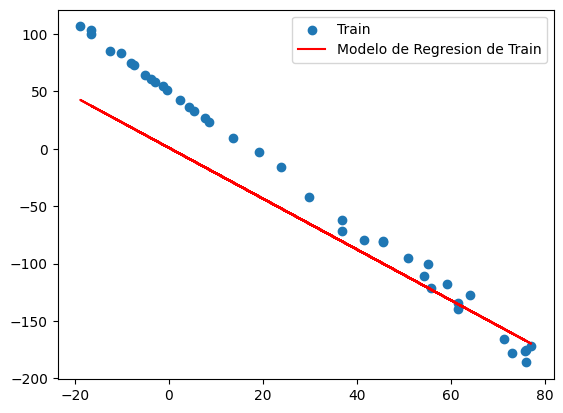

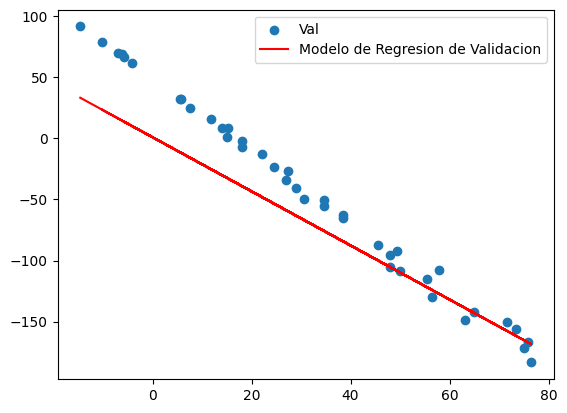

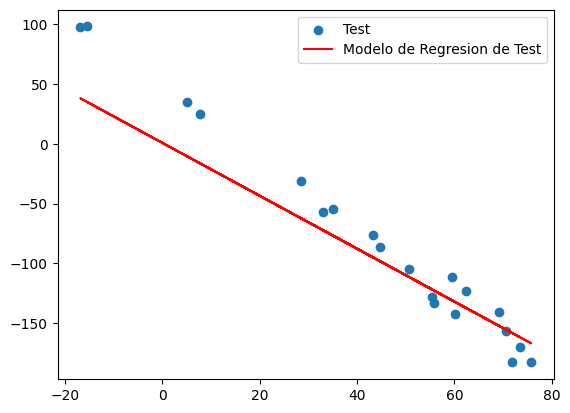

In [40]:
#Primero importaremos plt para hacer los scatter plots
import matplotlib.pyplot as plt

#Haremos el scatter plot de train
plt.scatter(x_train, y_train, label='Train')
plt.plot(x_train, model.predict(x_train), color='red', label='Modelo de Regresion de Train')
plt.legend()
plt.show()
plt.close()

#Haremos el scatter plot de val
plt.scatter(x_val, y_val, label='Val')
plt.plot(x_val, model.predict(x_val), color='red', label='Modelo de Regresion de Validacion')
plt.legend()
plt.show()
plt.close()

#Haremos el scatter plot de test
plt.scatter(x_test, y_test, label='Test')
plt.plot(x_test, model.predict(x_test), color='red', label='Modelo de Regresion de Test')
plt.legend()
plt.show()
plt.close()

## **7. Crea una lista que contenga 20 elementos (enteros) entre 2 y 39 (sin repetición, y que incluyan el número 2). Estos valores representarán la cantidad de instancias que se usarán para el análisis**

In [84]:
#Primero importamos la libreria random
import random

#Luego creamos la lista empezando del 3 para luego insertar el valor de 2
#asi asegurandonos de que la lista lo contenga pero no se repita
lista = random.sample(range(3, 40), 19)

#Ahora insertamos el valor de 2 a la lista
lista.insert(0,2)

print(lista)

[2, 38, 13, 32, 16, 27, 6, 8, 15, 12, 7, 3, 21, 28, 10, 4, 9, 31, 22, 25]


## **8. Para cada uno de los tamaños del punto anterior, entrena 100 modelos usando un subconjunto aleatorio del set de entrenamiento que contenga esa cantidad de muestras. Por ejemplo, para el tamaño de 2 muestras, se deben entrenar 100 modelos utilizando 2 muestras seleccionadas aleatoriamente de las 40 muestras disponibles en el set de entrenamiento**

In [117]:
import numpy as np

#Primero asignaremos una variable que contenga los resultados

resultados = {}

#Utilizaremos un for para hacer los entrenamientos
for i in lista:
    modelos_train = []
    pred_train = []

    for _ in range(100):
        valor_r = random.sample(range(len(x_train)), i)
        x_train_1 = x_train.iloc[valor_r]
        y_train_1 = y_train.iloc[valor_r]

        modelo1 = SGDRegressor(learning_rate='constant', eta0=1E-4, max_iter=1000000, random_state=seed)
        modelo1.fit(x_train_1, y_train_1)

        modelos_train.append(modelo1)

    resultados[i] = {'modelos': modelos_train, 'x_train_1': x_train_1, 'y_train_1': y_train_1, 'x_train': x_train, 'y_train': y_train}

## **9. Para cada uno de los modelos del punto anterior, calcula el error cuadrático medio en el subconjunto de entrenamiento (el que tiene un número cambiante de muestras), y en el subconjunto de validación**

In [129]:
#Primero crearemos mse_resultados para almacenar los valores de MSE, tambien crearemos e_train y e_val para almacenar los datos de mse de train y validacion
mse_resultados = {}

e_train = {tamaño: [] for tamaño in lista}
e_val = {tamaño: [] for tamaño in lista}

#Creamos un for el cual calcula el MSE de los datos de train y validacion
for tamaño,data in resultados.items():
  modelos = data['modelos']
  x_train_1 = data['x_train_1']
  y_train_1 = data['y_train_1']
  x_train = data['x_train']
  y_train = data['y_train']

  mse_train_tamaño = []
  mse_val_tamaño = []

  for modelo in modelos:
        #Predicción de entrenamiento
        pred_train = modelo.predict(x_train_1)
        mse_train = mean_squared_error(y_train_1, pred_train)
        mse_train_tamaño.append(mse_train)

        #Predicción de validación
        pred_val = modelo.predict(x_val)
        mse_val = mean_squared_error(y_val, pred_val)
        mse_val_tamaño.append(mse_val)

  #Asignamos los promedios de los valores de MSE tanto de train como de validacion
  mse_resultados[tamaño] = {'mse_train': np.mean(mse_train_tamaño),'mse_val': np.mean(mse_val_tamaño)}


## **10. Calcula el promedio de las 100 repeticiones para cada uno de los modelos y sus errores. Esto debería generar dos listas de 20 valores cada uno, donde cada elemento representa el error promedio de las 100 repeticiones que se hicieron para cada subconjunto de entrenamiento**

In [139]:
#Generamos variables en las cuales se van a guardar los promedios de train y validacion
promedio_train = {}
promedio_val = {}

#Hacemos un for el cual guarde el valor de cada MSE de train y validacion en las variables pasadas
for tamaño in lista:
    promedio_train[tamaño] = mse_resultados[tamaño]['mse_train']
    promedio_val[tamaño] = mse_resultados[tamaño]['mse_val']


print(promedio_train)
print(promedio_val)
print(len(promedio_train))
print(len(promedio_val))

{2: 885.3065490877322, 38: 1089.913981991267, 13: 878.6438976555506, 32: 1517.8032164007348, 16: 1279.8083676078877, 27: 1354.195175930136, 6: 1515.4995396814836, 8: 899.7355930690792, 15: 1096.2881032595067, 12: 1009.7260338693916, 7: 81.38480407681114, 3: 205.66660242654336, 21: 1197.9372725965577, 28: 1517.1354281661263, 10: 1124.25870359679, 4: 57.71253569565476, 9: 62.06684015129164, 31: 1344.4862067385732, 22: 1290.873500676549, 25: 1170.9157212600471}
{2: 8756.510169429217, 38: 827.6883517101336, 13: 789.2108971448808, 32: 925.8761983394106, 16: 865.5962921031349, 27: 950.6352892148891, 6: 799.1111644106204, 8: 819.0174602218592, 15: 945.7414548946722, 12: 836.1961033055783, 7: 86.206143866388, 3: 147.02039019352588, 21: 931.033995952337, 28: 951.869164679127, 10: 796.7393819303048, 4: 75.04931296488206, 9: 61.88941457758173, 31: 856.8656511168365, 22: 929.622802120279, 25: 957.6510291197867}
20
20


## **11. Agrega a las listas anteriores los errores de entrenamiento y validación de la línea base**

In [140]:
#Hacemos un append el cual agregue los valores
e_train[tamaño].append(mse_train)
e_val[tamaño].append(mse_val)

## **12. Haz una gráfica donde se muestre la evolución del error promedio de entrenamiento y validación, para cada uno de los diferentes tamaños de entrenamiento**

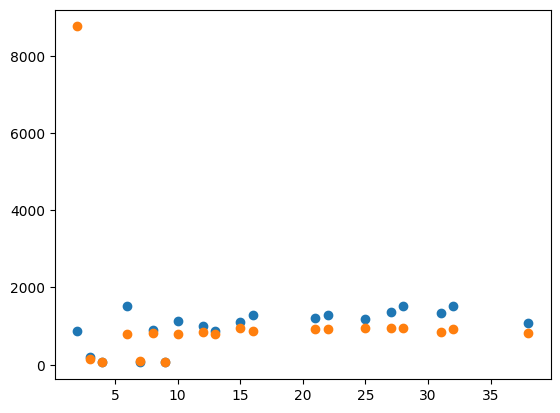

In [141]:
plt.scatter(x=lista, y=promedio_train.values(), label='Train')
plt.scatter(x=lista, y=promedio_val.values(), label='Val')

## **13. Con base en la grafica anterior, explica el tipo de ajuste obtenido para el primer modelo (el entrenado sobre 2 muestras) y para el modelo final (el entrenado sobre 40 muestras). También explica como cambia el tipo de ajuste a medida que se incrementa el número de muestras del entrenamiento. Incluye también en tu análisis el grado de sesgo y de varianza para los diferentes modelos.**

## **14. Con base en la gráfica y los datos, identifica la cantidad de muestras más adecuada para realizar el entrenamiento. Justifica tu selección.**

## **15. Entrena un nuevo modelo utilizando esa cantidad de muestras, y calcula su error cuadrático medio sobre el subconjunto de entrenamiento (el de la cantidad de muestras seleccionadas), el de validación, y el de prueba.**

## **16. Compara los valores del punto anterior contra los errores obtenidos para la línea base (ver punto 5)**

## **17. Argumenta cuál configuración funcionó mejor, y por qué**